In [ ]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from skimage import color

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 11s 0us/step


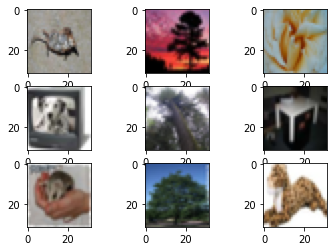

In [ ]:
for i in range (9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[20+i])
plt.show()


In [ ]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
#chuyen hinh anh ve mau gray 
x_train = color.rgb2gray(x_train)
y_train = color.rgb2gray(y_train)
x_test = color.rgb2gray(x_test)
y_test = color.rgb2gray(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


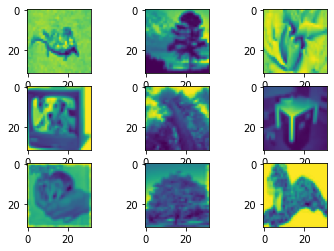

In [ ]:
for i in range (9):
    plt.subplot(330+i+1) # 3 hàng, 3 cột
    plt.imshow(x_train[20+i])
plt.show()

In [ ]:
x_train = x_train.reshape(50000,1024) 
x_test = x_test.reshape(10000,1024)
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255 
x_test/= 255

In [ ]:
x_train.shape

(50000, 1024)

In [ ]:
x=x_test
x_test.shape


(10000, 1024)

In [ ]:
y_train = to_categorical(y_train,100) 
y_test = to_categorical(y_test,100)

In [ ]:
# Model ANN
model = Sequential()
model.add(Dense(512, activation ='relu', input_shape = (1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation = 'softmax')) # => Output
model.add(Dropout(0.1))

In [ ]:
model.summary()
model.compile( loss='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy']) 
history = model.fit(x_train, y_train, batch_size = 128, epochs = 200, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
Total params: 838,756
Trainable params: 838,756
Non-trai

In [ ]:
model.save('finalcifar100.h5')
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss =',score[0])
print('Test accuracy =',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 3.7053 - accuracy: 0.1849
Test loss = 3.7052903175354004
Test accuracy = 0.18490000069141388


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


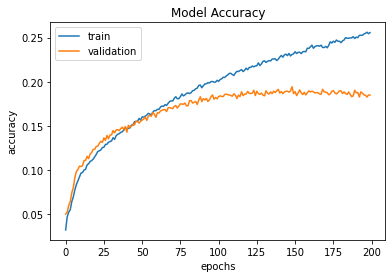

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

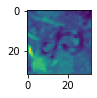

78


In [ ]:
import numpy as np
plt.subplot(330+1 )
plt.imshow(x_sample.reshape(32,32))
plt.show()
print(np.round(y_sample_true))

In [ ]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Mounted at /content/gdrive


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf


File ‘colab_pdf.py’ already there; not retrieving.



In [ ]:
colab_pdf('BTVNcifar100')

Mounted at /content/drive/




[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/BTVNcifar100 to pdf
[NbConvertApp] Support files will be in BTVNcifar10_files/
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Making directory ./BTVNcifar10_files
[NbConvertApp] Writing 76963 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 198700 bytes to /content/drive/My Drive/BTVNcifar10.pdf


'File Download Unsuccessful. Saved in Google Drive'